In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Visualización de los datos importantes para la predicción

## Puntos a favor contra número de victorias cada año

### Cargar los datos

In [4]:
# Lista para almacenar los DataFrames leídos
dataframes = []

# Leer los archivos CSV que contienen los DataFrames
archivos = ['2004.csv','2005.csv','2006.csv','2007.csv','2008.csv',
            '2009.csv','2010.csv','2011.csv','2012.csv','2013.csv',
            '2014.csv','2015.csv','2016.csv','2017.csv','2018.csv',
            '2019.csv','2020.csv','2021.csv','2022.csv']

#archivos = ['2021.csv']

archivos = ['2021.csv']

dataframe_equipos = pd.read_csv("teams.csv")

#archivos += archivos_segunda
dataframe_for_details = pd.read_csv("Datos_Formateados/2010.csv")

for archivo in archivos:
    # Leer el archivo y almacenar el DataFrame en la lista
    df = pd.read_csv("Datos_Formateados/"+archivo)
    df_invertido = df.iloc[::-1]
    dataframes.append(df_invertido)

# Concatenar todos los DataFrames en uno solo
dataframe_liga = pd.concat(dataframes, ignore_index=True)
dataframe_liga.shape
dataframe_liga = dataframe_liga.drop_duplicates()
dataframe_equipos = pd.read_csv("teams.csv")

### Conseguir los equipos de esa temporada

In [5]:
def get_equipos(dataframe: pd.DataFrame) -> list:
    equipos = dataframe["HOME_TEAM_ID"].drop_duplicates()
    return equipos

def get_nombres_equipo(lista_ids: list, dataframe_equipos: pd.DataFrame) -> list:
    list = []
    for equipo in lista_ids:
        list.append(dataframe_equipos.loc[dataframe_equipos['TEAM_ID'] == equipo, 'NICKNAME'].values[0])
    return list

equipos_ids = get_equipos(dataframe=dataframe_liga)
equipos_nombres = get_nombres_equipo(lista_ids=equipos_ids, dataframe_equipos=dataframe_equipos)
len(equipos_nombres)

30

### Conseguir el número de puntos a favor de la temporada de cada equipo

In [6]:
def get_puntos_a_favor(dataframe: pd.DataFrame, equipo: str) -> int:
    puntos_local = dataframe.loc[dataframe['HOME_TEAM_ID'] == equipo, 'PTS_home'].sum()
    puntos_visitante = dataframe.loc[dataframe['VISITOR_TEAM_ID'] == equipo, 'PTS_away'].sum()
    return puntos_local + puntos_visitante

for idx,equipo in enumerate(equipos_ids):
    puntos = get_puntos_a_favor(dataframe=dataframe_liga, equipo=equipo)
    #print("Los "+equipos_nombres[idx]+" han encestado: "+str(puntos)+" puntos")

### Conseguir el número de victorias de cada equipo

In [7]:
def get_victorias(dataframe: pd.DataFrame, equipo: str) -> int:
    victorias_local = len(dataframe[(dataframe['HOME_TEAM_ID'] == equipo) & (dataframe['HOME_TEAM_WINS'] == 1)])
    victorias_visitante = len(dataframe[(dataframe['VISITOR_TEAM_ID'] == equipo) & (dataframe['HOME_TEAM_WINS'] == 0)])
    return victorias_local + victorias_visitante

#for idx,equipo in enumerate(equipos_ids):
    #victorias = get_victorias(dataframe=dataframe_liga, equipo=equipo)
    #print("Los "+equipos_nombres[idx]+" han ganado: "+str(victorias)+" partidos")

### Graficar los datos

TypeError: 'numpy.float64' object cannot be interpreted as an integer

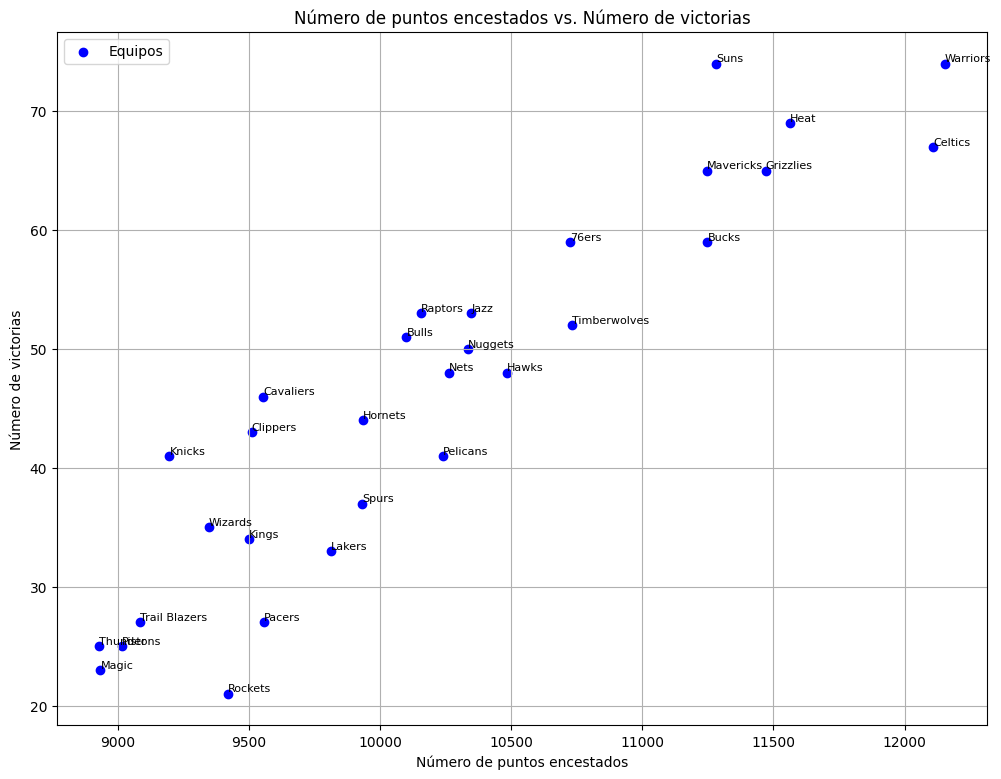

In [8]:
equipos_ids = get_equipos(dataframe=dataframe_liga)
equipos_nombres = get_nombres_equipo(lista_ids=equipos_ids, dataframe_equipos=dataframe_equipos)
puntos_encestados_todos_equipos = []
victorias_todos_equipos = []
for equipo in equipos_ids:
    puntos_encestados_todos_equipos.append(get_puntos_a_favor(dataframe=dataframe_liga, equipo=equipo))
    victorias_todos_equipos.append(get_victorias(dataframe=dataframe_liga, equipo=equipo))
maximos_puntos = max(puntos_encestados_todos_equipos)
maximas_victorias = max(victorias_todos_equipos)

plt.figure(figsize=(12, 9))
plt.scatter(puntos_encestados_todos_equipos, victorias_todos_equipos, color='blue', label='Equipos')  # Puntos en la gráfica para cada equipo
for i, equipo in enumerate(equipos_nombres):
    plt.text(puntos_encestados_todos_equipos[i], victorias_todos_equipos[i], equipo, fontsize=8, ha='left', va='bottom')
plt.xlabel('Número de puntos encestados')
plt.ylabel('Número de victorias')
plt.title('Número de puntos encestados vs. Número de victorias')
plt.grid(True)
plt.legend()
plt.xticks(range(0, maximos_puntos+1, 5))  # Definir los límites y el paso del eje x
plt.yticks(range(0, maximas_victorias+1, 2))  # Definir los límites y el paso del eje y
plt.show()

## Puntos en contra vs victorias cada año

### Conseguir puntos en contra de cada equipo cada año

In [ ]:
def get_puntos_en_contra(dataframe: pd.DataFrame, equipo: str) -> int:
    puntos_encajados_local = dataframe.loc[dataframe['HOME_TEAM_ID'] == equipo, 'PTS_away'].sum()
    puntos_encajados_visitante = dataframe.loc[dataframe['VISITOR_TEAM_ID'] == equipo, 'PTS_home'].sum()
    return puntos_encajados_local + puntos_encajados_visitante

#for idx,equipo in enumerate(equipos_ids):
#    puntos = get_puntos_en_contra(dataframe=dataframe_liga, equipo=equipo)
#    print("Los "+equipos_nombres[idx]+" han recibido: "+str(puntos)+" puntos")

### Graficar los datos

In [ ]:
equipos_ids = get_equipos(dataframe=dataframe_liga)
equipos_nombres = get_nombres_equipo(lista_ids=equipos_ids, dataframe_equipos=dataframe_equipos)
puntos_recibidos_todos_equipos = []
victorias_todos_equipos = []
for equipo in equipos_ids:
    puntos_recibidos_todos_equipos.append(get_puntos_en_contra(dataframe=dataframe_liga, equipo=equipo))
    victorias_todos_equipos.append(get_victorias(dataframe=dataframe_liga, equipo=equipo))
maximos_puntos = max(puntos_recibidos_todos_equipos)
maximas_victorias = max(victorias_todos_equipos)

plt.figure(figsize=(12, 9))
plt.scatter(puntos_recibidos_todos_equipos, victorias_todos_equipos, color='blue', label='Equipos')  # Puntos en la gráfica para cada equipo
for i, equipo in enumerate(equipos_nombres):
    plt.text(puntos_recibidos_todos_equipos[i], victorias_todos_equipos[i], equipo, fontsize=8, ha='left', va='bottom')
plt.xlabel('Número de puntos recibidos')
plt.ylabel('Número de victorias')
plt.title('Número de puntos recibidos vs. Número de victorias')
plt.grid(True)
plt.legend()
plt.xticks(range(0, maximos_puntos+1, 5))  # Definir los límites y el paso del eje x
plt.yticks(range(0, maximas_victorias+1, 2))  # Definir los límites y el paso del eje y
plt.show()

NameError: name 'get_puntos_en_contra' is not defined

## Fusionar ambos datos

### Primera aproximación: Basket Average

In [ ]:
def get_basket_average(dataframe: pd.DataFrame, equipo: str) -> int:
    basket_a_favor = get_puntos_a_favor(dataframe=dataframe, equipo=equipo)
    basket_en_contra = get_puntos_en_contra(dataframe=dataframe, equipo=equipo)
    return basket_a_favor - basket_en_contra

#for idx,equipo in enumerate(equipos_ids):
#    basket_average = get_basket_average(dataframe=dataframe_liga, equipo=equipo)
#    print("Los "+equipos_nombres[idx]+" tienen un basket average de: "+str(basket_average))

### Graficar los datos

In [ ]:
equipos_ids = get_equipos(dataframe=dataframe_liga)
equipos_nombres = get_nombres_equipo(lista_ids=equipos_ids, dataframe_equipos=dataframe_equipos)
basket_average_todos_equipos = []
victorias_todos_equipos = []
for equipo in equipos_ids:
    basket_average_todos_equipos.append(get_basket_average(dataframe=dataframe_liga, equipo=equipo))
    victorias_todos_equipos.append(get_victorias(dataframe=dataframe_liga, equipo=equipo))
minimos_puntos = min(basket_average_todos_equipos)
maximos_puntos = max(basket_average_todos_equipos)
maximas_victorias = max(victorias_todos_equipos)

plt.figure(figsize=(12, 9))
plt.scatter(basket_average_todos_equipos, victorias_todos_equipos, color='blue', label='Equipos')  # Puntos en la gráfica para cada equipo
for i, equipo in enumerate(equipos_nombres):
    plt.text(basket_average_todos_equipos[i], victorias_todos_equipos[i], equipo, fontsize=8, ha='left', va='bottom')
plt.xlabel('Basket Average')
plt.ylabel('Número de victorias')
plt.title('Basket Average vs. Número de victorias')
plt.grid(True)
plt.legend()
plt.xticks(range(minimos_puntos-1, maximos_puntos+1, 5))  # Definir los límites y el paso del eje x
plt.yticks(range(0, maximas_victorias+1, 2))  # Definir los límites y el paso del eje y
plt.show()

NameError: name 'get_puntos_en_contra' is not defined

### Segunda aproximación: media de puntos encestados por partido

In [ ]:
def get_partidos_jugados_por_equipo(dataframe: pd.DataFrame, equipo: str) -> int:
    partidos_jugados_local = len(dataframe.loc[dataframe['HOME_TEAM_ID'] == equipo])
    partidos_jugados_visitante = len(dataframe.loc[dataframe['VISITOR_TEAM_ID'] == equipo])
    return partidos_jugados_local + partidos_jugados_visitante
        
def get_media_puntos_encestados(dataframe: pd.DataFrame, equipo: str) -> float:
    puntos_encestados = get_puntos_a_favor(dataframe=dataframe, equipo=equipo)
    partidos_jugados_por_equipo = get_partidos_jugados_por_equipo(dataframe=dataframe, equipo=equipo)
    return puntos_encestados / partidos_jugados_por_equipo

#for idx,equipo in enumerate(equipos_ids):
#    puntos_medios_encestados = get_media_puntos_encestados(dataframe=dataframe_liga, equipo=equipo)
#    print("Los "+equipos_nombres[idx]+" encesta una media de: "+str(puntos_medios_encestados)+ " por partido")

### Graficar datos

TypeError: 'numpy.float64' object cannot be interpreted as an integer

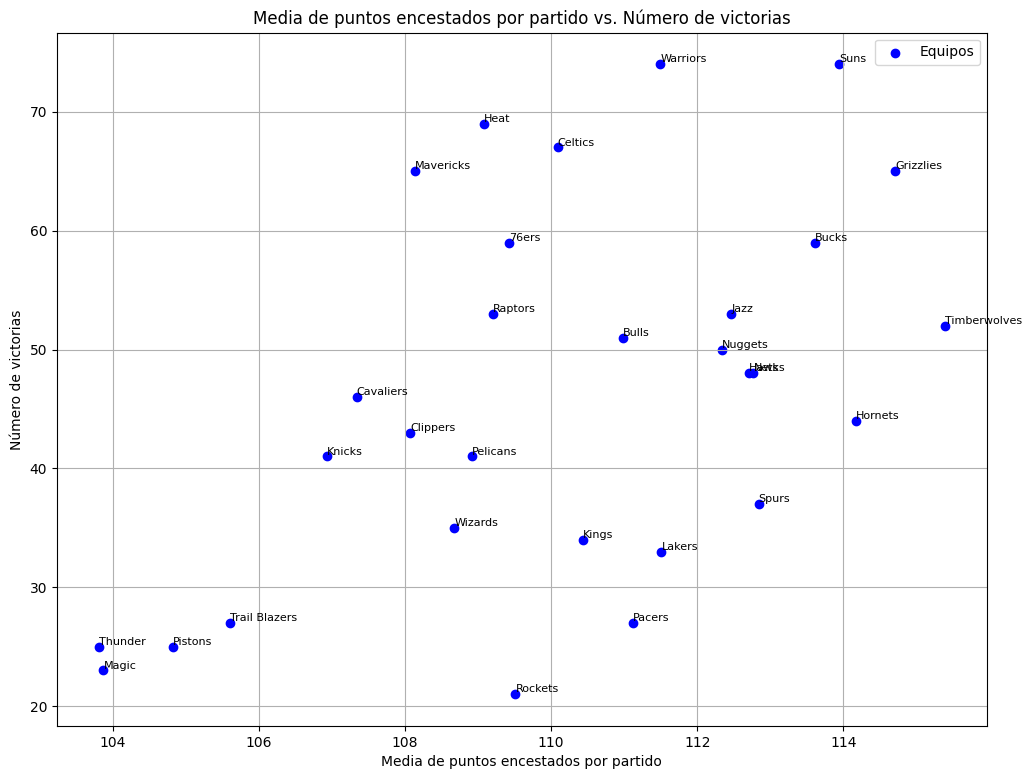

In [ ]:
equipos_ids = get_equipos(dataframe=dataframe_liga)
equipos_nombres = get_nombres_equipo(lista_ids=equipos_ids, dataframe_equipos=dataframe_equipos)
puntos_medios_encestados_todos_equipos = []
victorias_todos_equipos = []
for equipo in equipos_ids:
    puntos_medios_encestados_todos_equipos.append(get_media_puntos_encestados(dataframe=dataframe_liga, equipo=equipo))
    victorias_todos_equipos.append(get_victorias(dataframe=dataframe_liga, equipo=equipo))
maximos_puntos = max(puntos_medios_encestados_todos_equipos)
maximas_victorias = max(victorias_todos_equipos)

plt.figure(figsize=(12, 9))
plt.scatter(puntos_medios_encestados_todos_equipos, victorias_todos_equipos, color='blue', label='Equipos')  # Puntos en la gráfica para cada equipo
for i, equipo in enumerate(equipos_nombres):
    plt.text(puntos_medios_encestados_todos_equipos[i], victorias_todos_equipos[i], equipo, fontsize=8, ha='left', va='bottom')
plt.xlabel('Media de puntos encestados por partido')
plt.ylabel('Número de victorias')
plt.title('Media de puntos encestados por partido vs. Número de victorias')
plt.grid(True)
plt.legend()
plt.xticks(range(0, maximos_puntos+1, 5))  # Definir los límites y el paso del eje x
plt.yticks(range(0, maximas_victorias+1, 2))  # Definir los límites y el paso del eje y
plt.show()

### Tercera aproximación: Media de puntos recibidos por partido

In [ ]:
def get_partidos_jugados_por_equipo(dataframe: pd.DataFrame, equipo: str) -> int:
    partidos_jugados_local = len(dataframe.loc[dataframe['HOME_TEAM_ID'] == equipo])
    partidos_jugados_visitante = len(dataframe.loc[dataframe['VISITOR_TEAM_ID'] == equipo])
    return partidos_jugados_local + partidos_jugados_visitante
        
def get_media_puntos_recibidos(dataframe: pd.DataFrame, equipo: str) -> float:
    puntos_recibidos = get_puntos_en_contra(dataframe=dataframe, equipo=equipo)
    partidos_jugados_por_equipo = get_partidos_jugados_por_equipo(dataframe=dataframe, equipo=equipo)
    return puntos_recibidos / partidos_jugados_por_equipo

#for idx,equipo in enumerate(equipos_ids):
#   puntos_medios_recibidos = get_media_puntos_recibidos(dataframe=dataframe_liga, equipo=equipo)
#   print("Los "+equipos_nombres[idx]+" recibe una media de: "+str(puntos_medios_recibidos)+ " por partido")

### Graficar los datos

TypeError: 'numpy.float64' object cannot be interpreted as an integer

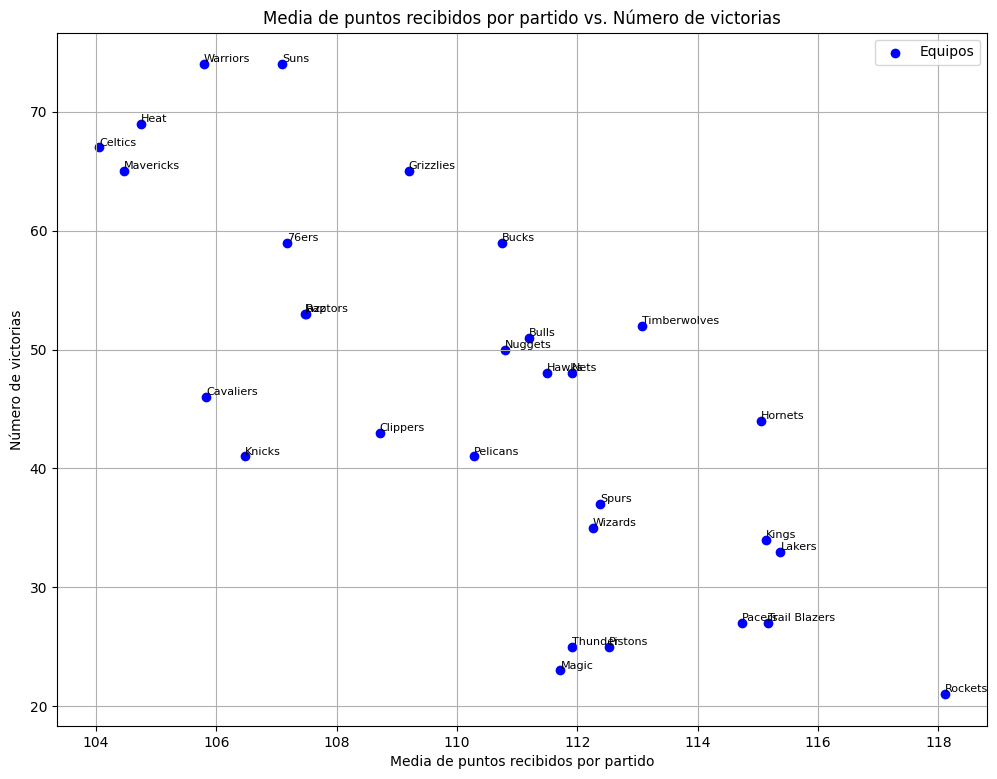

In [ ]:
equipos_ids = get_equipos(dataframe=dataframe_liga)
equipos_nombres = get_nombres_equipo(lista_ids=equipos_ids, dataframe_equipos=dataframe_equipos)
puntos_medios_recibidos_todos_equipos = []
victorias_todos_equipos = []
for equipo in equipos_ids:
    puntos_medios_recibidos_todos_equipos.append(get_media_puntos_recibidos(dataframe=dataframe_liga, equipo=equipo))
    victorias_todos_equipos.append(get_victorias(dataframe=dataframe_liga, equipo=equipo))
maximos_puntos = max(puntos_medios_recibidos_todos_equipos)
maximas_victorias = max(victorias_todos_equipos)

plt.figure(figsize=(12, 9))
plt.scatter(puntos_medios_recibidos_todos_equipos, victorias_todos_equipos, color='blue', label='Equipos')  # Puntos en la gráfica para cada equipo
for i, equipo in enumerate(equipos_nombres):
    plt.text(puntos_medios_recibidos_todos_equipos[i], victorias_todos_equipos[i], equipo, fontsize=8, ha='left', va='bottom')
plt.xlabel('Media de puntos recibidos por partido')
plt.ylabel('Número de victorias')
plt.title('Media de puntos recibidos por partido vs. Número de victorias')
plt.grid(True)
plt.legend()
plt.xticks(range(0, maximos_puntos+1, 5))  # Definir los límites y el paso del eje x
plt.yticks(range(0, maximas_victorias+1, 2))  # Definir los límites y el paso del eje y
plt.show()

### Cuarta aproximación: Basket Average medio

In [ ]:
def get_basket_average_medio(dataframe: pd.DataFrame, equipo: str) -> float:
    puntos_encestados = get_media_puntos_encestados(dataframe=dataframe, equipo=equipo)
    puntos_recibidos = get_media_puntos_recibidos(dataframe=dataframe, equipo=equipo)
    return puntos_encestados - puntos_recibidos

#for idx,equipo in enumerate(equipos_ids):
#   basket_average_medio = get_basket_average_medio(dataframe=dataframe_liga, equipo=equipo)
#   print("Los "+equipos_nombres[idx]+" tiene un basket average medio de: "+str(basket_average_medio)+ " por partido")

### Graficar datos

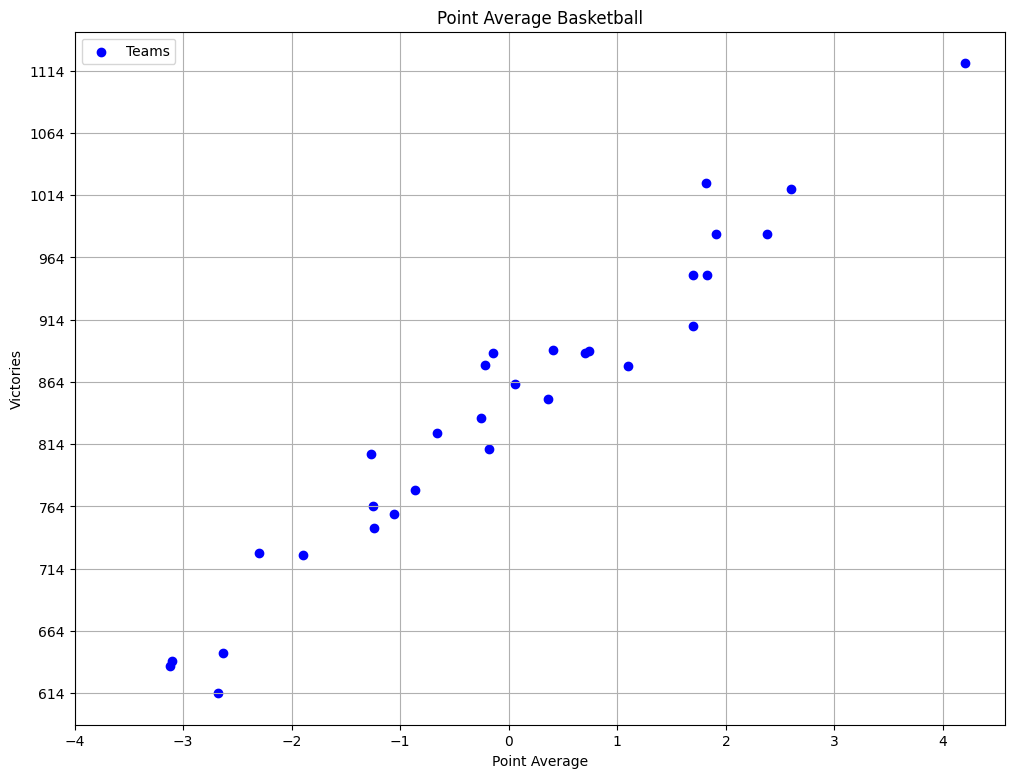

In [ ]:
equipos_ids = get_equipos(dataframe=dataframe_liga)
equipos_nombres = get_nombres_equipo(lista_ids=equipos_ids, dataframe_equipos=dataframe_equipos)
basket_average_medio_todos_equipos = []
victorias_todos_equipos = []
for equipo in equipos_ids:
    basket_average_medio_todos_equipos.append(get_basket_average_medio(dataframe=dataframe_liga, equipo=equipo))
    victorias_todos_equipos.append(get_victorias(dataframe=dataframe_liga, equipo=equipo))
minimos_puntos = min(basket_average_medio_todos_equipos)
maximos_puntos = max(basket_average_medio_todos_equipos)
maximas_victorias = max(victorias_todos_equipos)
minimo_victorias = min(victorias_todos_equipos)

plt.figure(figsize=(12, 9))
plt.scatter(basket_average_medio_todos_equipos, victorias_todos_equipos, color='blue', label='Teams')  # Puntos en la gráfica para cada equipo
#for i, equipo in enumerate(equipos_nombres):
#    plt.text(basket_average_medio_todos_equipos[i], victorias_todos_equipos[i], equipo, fontsize=8, ha='left', va='bottom')
plt.xlabel('Point Average')
plt.ylabel('Victories')
plt.title('Point Average Basketball')
plt.grid(True)
plt.legend()
plt.xticks(range(int(minimos_puntos)-1, int(maximos_puntos)+1, 1))  # Definir los límites y el paso del eje x
plt.yticks(range(int(minimo_victorias), int(maximas_victorias)+1, 50))  # Definir los límites y el paso del eje y
plt.show()

## Relevancia de Local o Visitante

### ¿Es importante el campo donde se juega?

In [ ]:
def get_resultados_totales(dataframe: pd.DataFrame) -> list:
    victorias_local = len(dataframe.loc[dataframe['HOME_TEAM_WINS'] == 1])
    victorias_visitante = len(dataframe.loc[dataframe['HOME_TEAM_WINS'] == 0])
    return (victorias_local,victorias_visitante)

resultados = get_resultados_totales(dataframe=dataframe_liga)
#print("Victorias local: "+str(resultados[0]))
#print("Victorias visitante: "+str(resultados[1]))

### Graficar datos

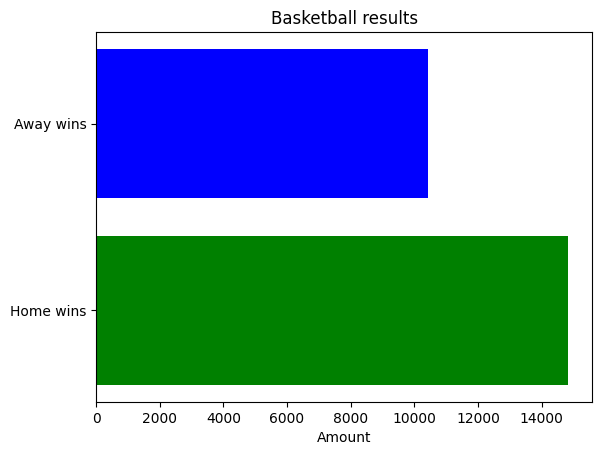

In [ ]:
resultados = get_resultados_totales(dataframe=dataframe_liga)
variables = ['Home wins','Away wins']

plt.barh(variables, resultados, color=['green', 'blue'])

plt.xlabel('Amount')
plt.title('Basketball results')

plt.show()

## Racha de victorias

In [ ]:
def get_resultados_equipo(dataframe: pd.DataFrame, equipo=equipo) -> list:
    lista_resultados = []
    for idx, fila in dataframe.iterrows():
        if fila['HOME_TEAM_ID'] == equipo:
            if fila['HOME_TEAM_WINS'] == 1:
                lista_resultados.append('W')
            else:
                lista_resultados.append('L')
        if fila['VISITOR_TEAM_ID'] == equipo:
            if fila['HOME_TEAM_WINS'] == 0:
                lista_resultados.append('W')
            else:
                lista_resultados.append('L')
    return lista_resultados

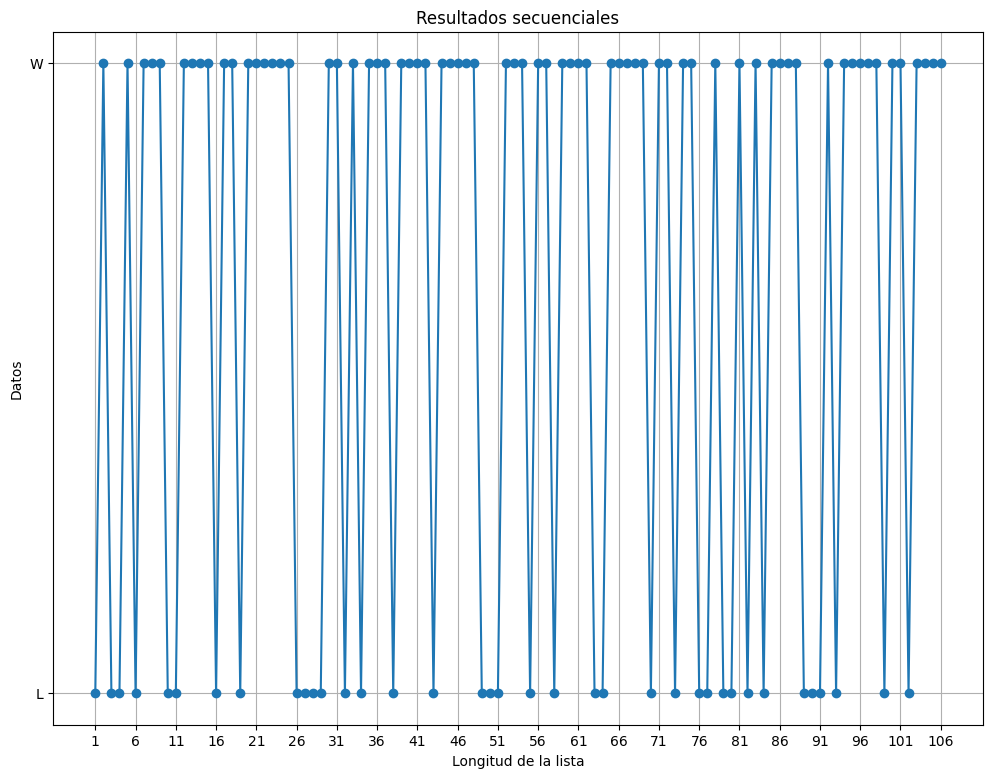

In [ ]:
datos = get_resultados_equipo(dataframe=dataframe_liga, equipo=1610612748)
datos = datos[::-1] #los datos aqui estan invertidos
longitud = len(datos)
plt.figure(figsize=(12, 9))
plt.plot(range(1, longitud + 1), datos, marker='o')

plt.xticks(range(1, longitud + 1, 5))

plt.xlabel('Longitud de la lista')
plt.ylabel('Datos')

plt.title('Resultados secuenciales')

# Mostrar la gráfica
plt.grid(True)
plt.show()

## Diferencia de basket average medio entre un partido y el anterior

### Puntos encestados por partido

In [9]:
def get_puntos_encestados_por_partido(dataframe: pd.DataFrame, equipo: str) -> list:
    lista_puntos_por_partido = []
    partidos_del_equipo = dataframe.loc[(dataframe['HOME_TEAM_ID'] == equipo) | (dataframe['VISITOR_TEAM_ID'] == equipo)]
    for idx, partido in partidos_del_equipo.iterrows():
        if partido['HOME_TEAM_ID'] == equipo:
            lista_puntos_por_partido.append(partido['PTS_home'])
        if partido['VISITOR_TEAM_ID'] == equipo:
            lista_puntos_por_partido.append(partido['PTS_away'])
    return lista_puntos_por_partido

lista = get_puntos_encestados_por_partido(dataframe=dataframe_liga, equipo=1610612764)
print(lista[::-1])

[108.0, 92.0, 103.0, 132.0, 102.0, 135.0, 127.0, 94.0, 123.0, 100.0, 102.0, 97.0, 127.0, 97.0, 109.0, 112.0, 118.0, 109.0, 109.0, 133.0, 114.0, 116.0, 86.0, 153.0, 117.0, 108.0, 103.0, 110.0, 113.0, 100.0, 80.0, 106.0, 98.0, 95.0, 115.0, 87.0, 105.0, 118.0, 117.0, 110.0, 112.0, 122.0, 102.0, 122.0, 111.0, 124.0, 119.0, 110.0, 112.0, 96.0, 124.0, 109.0, 98.0, 105.0, 107.0, 98.0, 119.0, 110.0, 90.0, 101.0, 115.0, 99.0, 120.0, 101.0, 102.0, 103.0, 103.0, 97.0, 87.0, 105.0, 104.0, 97.0, 101.0, 115.0, 100.0, 111.0, 115.0, 122.0, 116.0, 90.0, 135.0, 98.0, 113.0, 108.0, 99.0, 119.0]


### Puntos recibidos por partido

In [10]:
def get_puntos_recibidos_por_partido(dataframe: pd.DataFrame, equipo: str) -> list:
    lista_puntos_por_partido = []
    partidos_del_equipo = dataframe.loc[(dataframe['HOME_TEAM_ID'] == equipo) | (dataframe['VISITOR_TEAM_ID'] == equipo)]
    for idx, partido in partidos_del_equipo.iterrows():
        if partido['HOME_TEAM_ID'] == equipo:
            lista_puntos_por_partido.append(partido['PTS_away'])
        if partido['VISITOR_TEAM_ID'] == equipo:
            lista_puntos_por_partido.append(partido['PTS_home'])
    return lista_puntos_por_partido

lista = get_puntos_recibidos_por_partido(dataframe=dataframe_liga, equipo=1610612764)
print(lista[::-1])

[124.0, 114.0, 118.0, 114.0, 144.0, 103.0, 110.0, 107.0, 115.0, 97.0, 114.0, 115.0, 119.0, 100.0, 127.0, 126.0, 127.0, 122.0, 115.0, 123.0, 117.0, 113.0, 92.0, 157.0, 103.0, 113.0, 94.0, 123.0, 112.0, 121.0, 95.0, 103.0, 112.0, 115.0, 116.0, 116.0, 109.0, 119.0, 98.0, 115.0, 106.0, 118.0, 100.0, 130.0, 114.0, 121.0, 120.0, 93.0, 119.0, 117.0, 117.0, 103.0, 118.0, 119.0, 113.0, 123.0, 116.0, 116.0, 102.0, 116.0, 107.0, 116.0, 114.0, 99.0, 127.0, 109.0, 100.0, 112.0, 97.0, 100.0, 92.0, 94.0, 94.0, 87.0, 109.0, 118.0, 112.0, 111.0, 107.0, 104.0, 134.0, 83.0, 115.0, 113.0, 117.0, 125.0]


### Media puntos encestados por partido

In [11]:
def get_media_puntos_encestados_por_partido(dataframe: pd.DataFrame, equipo: str) -> list:
    lista_puntos_por_partido = get_puntos_encestados_por_partido(dataframe=dataframe, equipo=equipo)
    lista_puntos_por_partido = lista_puntos_por_partido[::-1]
    lista_media_puntos_por_partido = []
    puntos_acumulados = 0
    for idx, valor in enumerate(lista_puntos_por_partido):
        lista_media_puntos_por_partido.append((valor + puntos_acumulados) / (idx+1))
        puntos_acumulados += valor
    return lista_media_puntos_por_partido
lista = get_media_puntos_encestados_por_partido(dataframe=dataframe_liga, equipo=1610612764)
print(lista)

[108.0, 100.0, 101.0, 108.75, 107.4, 112.0, 114.14285714285714, 111.625, 112.88888888888889, 111.6, 110.72727272727273, 109.58333333333333, 110.92307692307692, 109.92857142857143, 109.86666666666666, 110.0, 110.47058823529412, 110.38888888888889, 110.3157894736842, 111.45, 111.57142857142857, 111.77272727272727, 110.65217391304348, 112.41666666666667, 112.6, 112.42307692307692, 112.07407407407408, 112.0, 112.03448275862068, 111.63333333333334, 110.61290322580645, 110.46875, 110.0909090909091, 109.6470588235294, 109.8, 109.16666666666667, 109.05405405405405, 109.28947368421052, 109.48717948717949, 109.5, 109.5609756097561, 109.85714285714286, 109.67441860465117, 109.95454545454545, 109.97777777777777, 110.28260869565217, 110.46808510638297, 110.45833333333333, 110.48979591836735, 110.2, 110.47058823529412, 110.4423076923077, 110.20754716981132, 110.11111111111111, 110.05454545454545, 109.83928571428571, 110.0, 110.0, 109.66101694915254, 109.51666666666667, 109.60655737704919, 109.435483

### Media puntos encajados por partido

In [12]:
def get_media_puntos_recibidos_por_partido(dataframe: pd.DataFrame, equipo: str) -> list:
    lista_puntos_por_partido = get_puntos_recibidos_por_partido(dataframe=dataframe, equipo=equipo)
    lista_puntos_por_partido = lista_puntos_por_partido[::-1]
    lista_media_puntos_por_partido = []
    puntos_acumulados = 0
    for idx, valor in enumerate(lista_puntos_por_partido):
        lista_media_puntos_por_partido.append((valor + puntos_acumulados) / (idx+1))
        puntos_acumulados += valor
    return lista_media_puntos_por_partido
lista = get_media_puntos_recibidos_por_partido(dataframe=dataframe_liga, equipo=1610612764)
print(lista)

[124.0, 119.0, 118.66666666666667, 117.5, 122.8, 119.5, 118.14285714285714, 116.75, 116.55555555555556, 114.6, 114.54545454545455, 114.58333333333333, 114.92307692307692, 113.85714285714286, 114.73333333333333, 115.4375, 116.11764705882354, 116.44444444444444, 116.36842105263158, 116.7, 116.71428571428571, 116.54545454545455, 115.47826086956522, 117.20833333333333, 116.64, 116.5, 115.66666666666667, 115.92857142857143, 115.79310344827586, 115.96666666666667, 115.29032258064517, 114.90625, 114.81818181818181, 114.82352941176471, 114.85714285714286, 114.88888888888889, 114.72972972972973, 114.84210526315789, 114.41025641025641, 114.425, 114.21951219512195, 114.30952380952381, 113.97674418604652, 114.3409090909091, 114.33333333333333, 114.47826086956522, 114.59574468085107, 114.14583333333333, 114.24489795918367, 114.3, 114.3529411764706, 114.13461538461539, 114.20754716981132, 114.29629629629629, 114.27272727272727, 114.42857142857143, 114.45614035087719, 114.48275862068965, 114.27118644

### Basket average por partido

In [13]:
def get_basket_average_por_partido(dataframe: pd.DataFrame, equipo: str) -> list:
    lista_puntos_encestados_por_partido = get_puntos_encestados_por_partido(dataframe=dataframe, equipo=equipo)
    lista_puntos_recibidos_por_partido = get_puntos_recibidos_por_partido(dataframe=dataframe, equipo=equipo)
    lista_puntos_encestados_por_partido = lista_puntos_encestados_por_partido[::-1]
    lista_puntos_recibidos_por_partido = lista_puntos_recibidos_por_partido[::-1]
    lista_basket_average_por_partido = []
    for idx, valor in enumerate(lista_puntos_encestados_por_partido):
        lista_basket_average_por_partido.append(valor - lista_puntos_recibidos_por_partido[idx])
    return lista_basket_average_por_partido
lista = get_basket_average_por_partido(dataframe=dataframe_liga, equipo=1610612764)
print(lista)

[-16.0, -22.0, -15.0, 18.0, -42.0, 32.0, 17.0, -13.0, 8.0, 3.0, -12.0, -18.0, 8.0, -3.0, -18.0, -14.0, -9.0, -13.0, -6.0, 10.0, -3.0, 3.0, -6.0, -4.0, 14.0, -5.0, 9.0, -13.0, 1.0, -21.0, -15.0, 3.0, -14.0, -20.0, -1.0, -29.0, -4.0, -1.0, 19.0, -5.0, 6.0, 4.0, 2.0, -8.0, -3.0, 3.0, -1.0, 17.0, -7.0, -21.0, 7.0, 6.0, -20.0, -14.0, -6.0, -25.0, 3.0, -6.0, -12.0, -15.0, 8.0, -17.0, 6.0, 2.0, -25.0, -6.0, 3.0, -15.0, -10.0, 5.0, 12.0, 3.0, 7.0, 28.0, -9.0, -7.0, 3.0, 11.0, 9.0, -14.0, 1.0, 15.0, -2.0, -5.0, -18.0, -6.0]


### Basket average medio por partido

In [14]:
def get_media_basket_average_por_partido(dataframe: pd.DataFrame, equipo: str) -> list:
    lista_media_puntos_encestados_por_partido = get_media_puntos_encestados_por_partido(dataframe=dataframe, equipo=equipo)
    lista_media_puntos_recibidos_por_partido = get_media_puntos_recibidos_por_partido(dataframe=dataframe, equipo=equipo)
    lista_media_basket_average_por_partido = []
    for idx, valor in enumerate(lista_media_puntos_encestados_por_partido):
        lista_media_basket_average_por_partido.append((valor - lista_media_puntos_recibidos_por_partido[idx]))
    return lista_media_basket_average_por_partido
lista = get_media_basket_average_por_partido(dataframe=dataframe_liga, equipo=1610612764)
print(lista)

[-16.0, -19.0, -17.66666666666667, -8.75, -15.399999999999991, -7.5, -4.0, -5.125, -3.6666666666666714, -3.0, -3.818181818181813, -5.0, -4.0, -3.9285714285714306, -4.866666666666674, -5.4375, -5.64705882352942, -6.055555555555557, -6.05263157894737, -5.25, -5.142857142857139, -4.7727272727272805, -4.826086956521735, -4.791666666666657, -4.040000000000006, -4.07692307692308, -3.5925925925925952, -3.9285714285714306, -3.7586206896551744, -4.333333333333329, -4.677419354838719, -4.4375, -4.7272727272727195, -5.176470588235304, -5.057142857142864, -5.722222222222214, -5.675675675675677, -5.55263157894737, -4.92307692307692, -4.924999999999997, -4.658536585365852, -4.452380952380949, -4.302325581395351, -4.38636363636364, -4.355555555555554, -4.195652173913047, -4.1276595744680975, -3.6875, -3.7551020408163254, -4.099999999999994, -3.882352941176478, -3.6923076923076934, -4.0, -4.185185185185176, -4.218181818181819, -4.589285714285722, -4.456140350877192, -4.482758620689651, -4.610169491525

## Graficar los datos

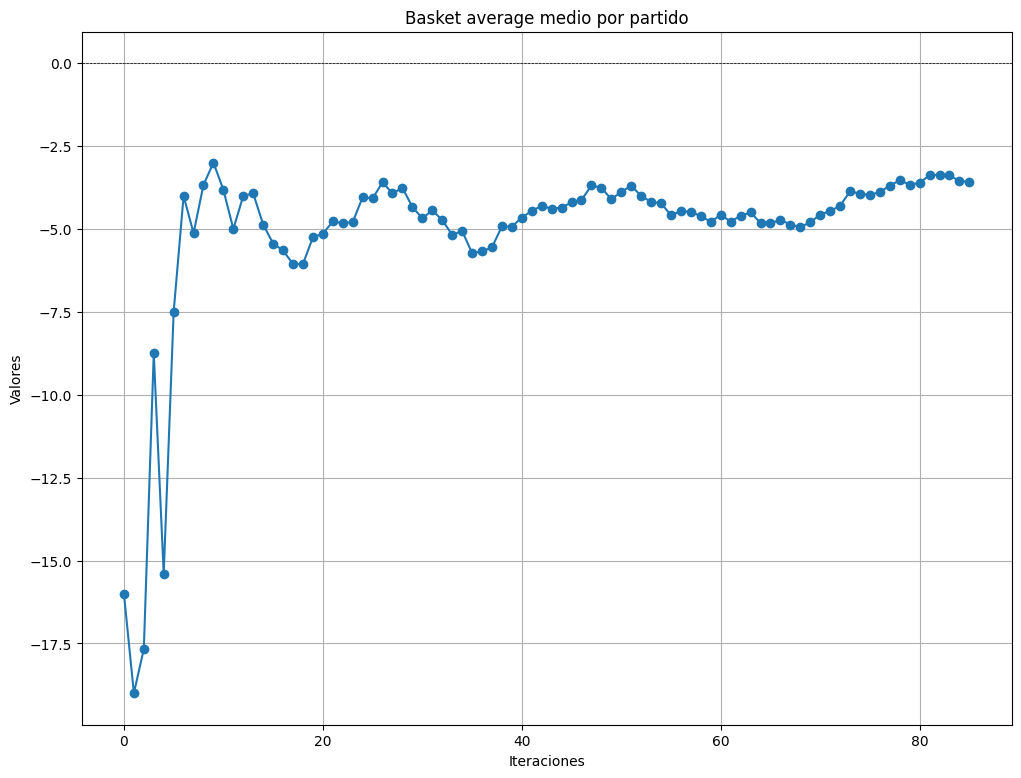

In [15]:
datos = get_media_basket_average_por_partido(dataframe=dataframe_liga, equipo=1610612764)
iteraciones = range(len(datos))

plt.figure(figsize=(12, 9))
plt.plot(iteraciones, datos, marker='o', linestyle='-')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')

plt.xlabel('Iteraciones')
plt.ylabel('Valores')

plt.title('Basket average medio por partido')

plt.grid(True)
plt.show()

### Diferencia de basket average medio respecto al partido anterior

In [16]:
def get_diferencia_media_basket_average_por_partido(dataframe: pd.DataFrame, equipo: str) -> list:
    lista_media_basket_average_por_partido = get_media_basket_average_por_partido(dataframe=dataframe, equipo=equipo)
    lista_diferencias = []
    valor_anterior = 0
    for valor in lista_media_basket_average_por_partido:
        lista_diferencias.append(valor - valor_anterior)
        valor_anterior = valor
    return lista_diferencias
lista = get_diferencia_media_basket_average_por_partido(dataframe=dataframe_liga, equipo=1610612764)
print(lista)

[-16.0, -3.0, 1.3333333333333286, 8.916666666666671, -6.6499999999999915, 7.8999999999999915, 3.5, -1.125, 1.4583333333333286, 0.6666666666666714, -0.818181818181813, -1.181818181818187, 1.0, 0.0714285714285694, -0.9380952380952436, -0.5708333333333258, -0.20955882352942012, -0.408496732026137, 0.0029239766081872176, 0.8026315789473699, 0.1071428571428612, 0.3701298701298583, -0.05335968379445433, 0.03442028985507761, 0.7516666666666509, -0.03692307692307395, 0.484330484330485, -0.3359788359788354, 0.16995073891625623, -0.5747126436781542, -0.34408602150539025, 0.23991935483871885, -0.2897727272727195, -0.4491978609625846, 0.1193277310924401, -0.6650793650793503, 0.046546546546537115, 0.1230440967283073, 0.6295546558704501, -0.0019230769230773603, 0.2664634146341456, 0.20615563298490258, 0.15005537098559785, -0.08403805496828909, 0.030808080808085947, 0.15990338164250772, 0.06799259944494906, 0.4401595744680975, -0.06760204081632537, -0.34489795918366895, 0.2176470588235162, 0.19004524

### Graficar datos

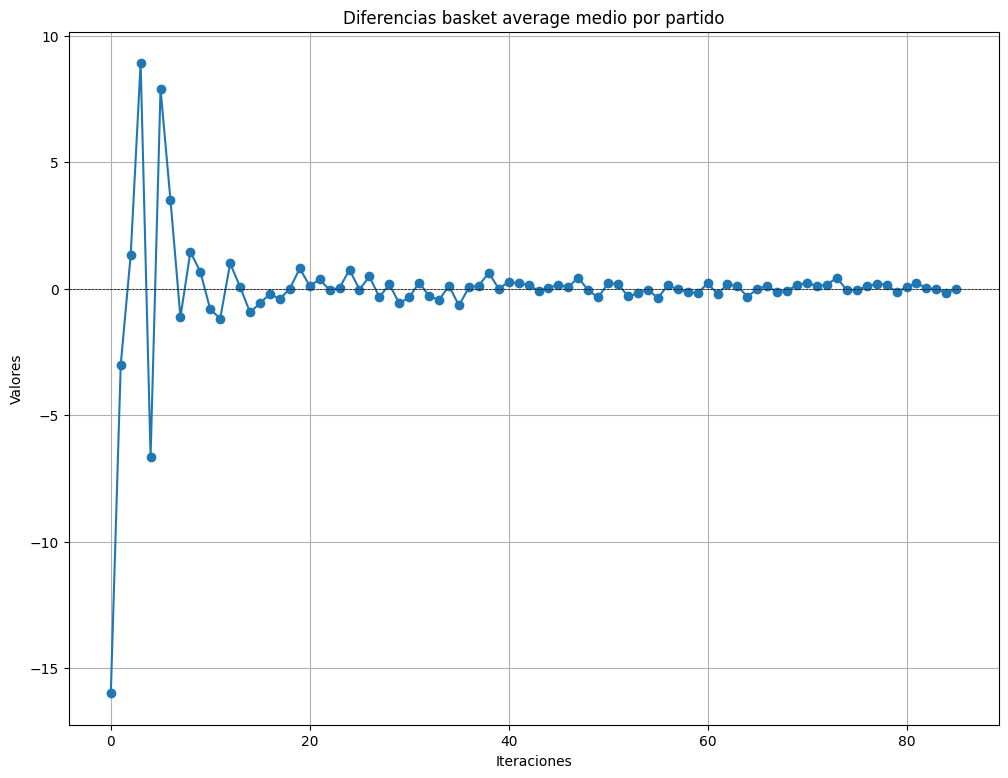

In [ ]:
datos = get_diferencia_media_basket_average_por_partido(dataframe=dataframe_liga, equipo=1610612764)
iteraciones = range(len(datos))
plt.figure(figsize=(12, 9))
plt.plot(iteraciones, datos, marker='o', linestyle='-')

plt.axhline(0, color='black', linewidth=0.5, linestyle='--')

plt.xlabel('Iteraciones')
plt.ylabel('Valores')

plt.title('Diferencias basket average medio por partido')

plt.grid(True)
plt.show()

### Graficar basket average medio y diferencias

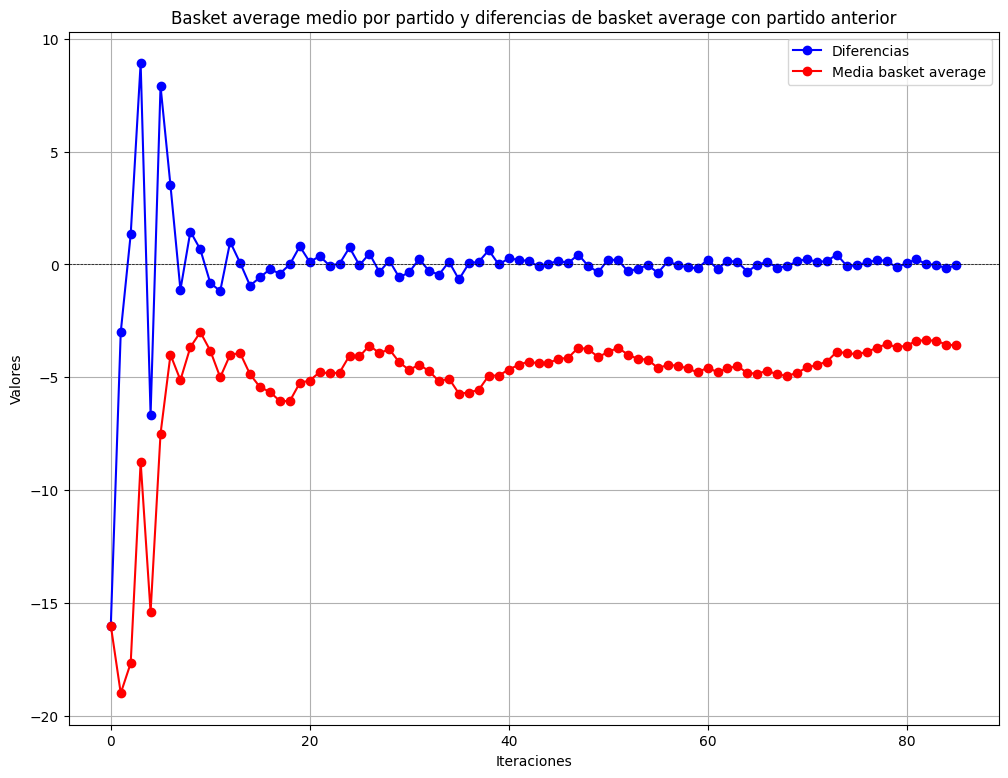

In [18]:
datos1 = get_diferencia_media_basket_average_por_partido(dataframe=dataframe_liga, equipo=1610612764)
datos2 = get_media_basket_average_por_partido(dataframe=dataframe_liga,equipo=1610612764)
iteraciones = range(len(datos1))

plt.figure(figsize=(12, 9))
plt.plot(iteraciones, datos1, marker='o', linestyle='-', color='blue', label='Diferencias')
plt.plot(iteraciones, datos2, marker='o', linestyle='-', color='red', label='Media basket average')

plt.axhline(0, color='black', linewidth=0.5, linestyle='--')

plt.xlabel('Iteraciones')
plt.ylabel('Valores')

plt.title('Basket average medio por partido y diferencias de basket average con partido anterior')

plt.legend()
plt.grid(True)
plt.show()

data = {
    'Matches': list(iteraciones),
    'Point Average Wizards': datos2,
    'Difference in point average Wizards': datos1
}
    
df = pd.DataFrame(data)

# Exportar a un archivo Excel
df.to_excel('diferencias_basket.xlsx', index=False)

### Puntos en liga

In [ ]:
def get_puntos_en_liga_equipo(dataframe: pd.DataFrame, equipo: str) -> list:
   numero_victorias_home = dataframe.loc[(dataframe['HOME_TEAM_ID'] == equipo) & (dataframe['HOME_TEAM_WINS'] == 1), 'HOME_TEAM_WINS'].count()
   numero_victorias_away = dataframe.loc[(dataframe['VISITOR_TEAM_ID'] == equipo) & (dataframe['HOME_TEAM_WINS'] == 0), 'HOME_TEAM_WINS'].count()
   numero_derrotas_home = dataframe.loc[(dataframe['HOME_TEAM_ID'] == equipo) & (dataframe['HOME_TEAM_WINS'] == 0), 'HOME_TEAM_WINS'].count()
   numero_derrotas_away = dataframe.loc[(dataframe['VISITOR_TEAM_ID'] == equipo) & (dataframe['HOME_TEAM_WINS'] == 1), 'HOME_TEAM_WINS'].count()

   return 2 * (numero_victorias_home + numero_victorias_away) + (numero_derrotas_home + numero_derrotas_away)

puntos = get_puntos_en_liga_equipo(dataframe=dataframe_liga, equipo=1610612764)
puntos

121

### Graficar datos

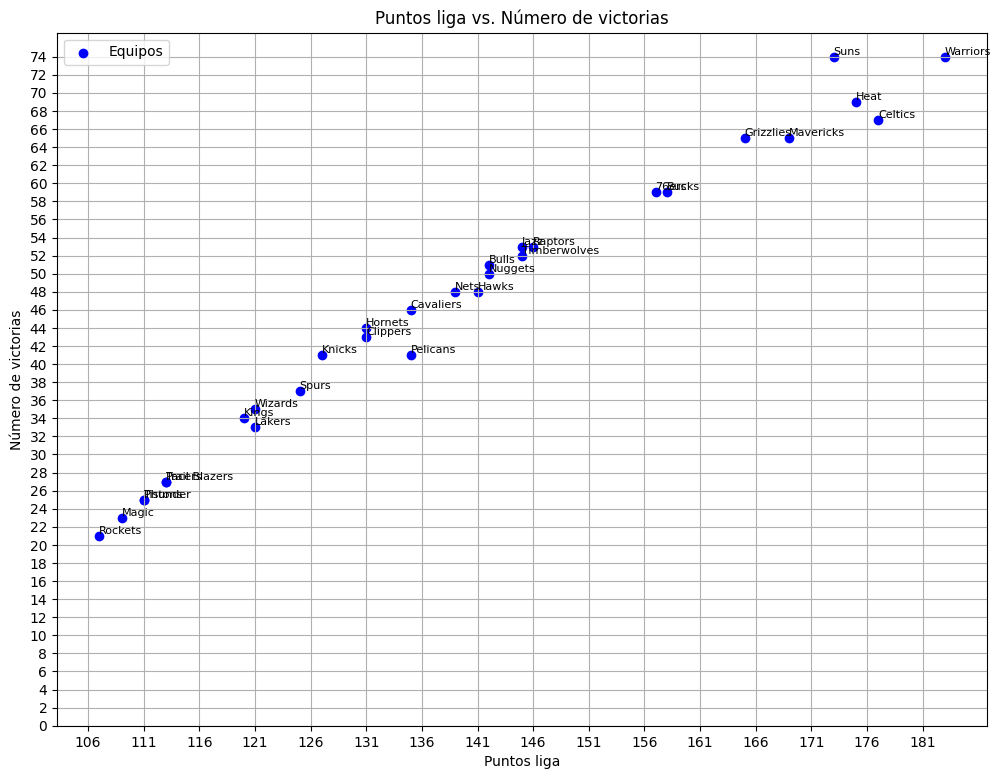

In [ ]:
equipos_ids = get_equipos(dataframe=dataframe_liga)
equipos_nombres = get_nombres_equipo(lista_ids=equipos_ids, dataframe_equipos=dataframe_equipos)
puntos_en_liga_todos_equipos = []
victorias_todos_equipos = []
for equipo in equipos_ids:
    puntos_en_liga_todos_equipos.append(get_puntos_en_liga_equipo(dataframe=dataframe_liga, equipo=equipo))
    victorias_todos_equipos.append(get_victorias(dataframe=dataframe_liga, equipo=equipo))
minimos_puntos = min(puntos_en_liga_todos_equipos)
maximos_puntos = max(puntos_en_liga_todos_equipos)
maximas_victorias = max(victorias_todos_equipos)

plt.figure(figsize=(12, 9))
plt.scatter(puntos_en_liga_todos_equipos, victorias_todos_equipos, color='blue', label='Equipos')  # Puntos en la gráfica para cada equipo
for i, equipo in enumerate(equipos_nombres):
    plt.text(puntos_en_liga_todos_equipos[i], victorias_todos_equipos[i], equipo, fontsize=8, ha='left', va='bottom')
plt.xlabel('Puntos liga')
plt.ylabel('Número de victorias')
plt.title('Puntos liga vs. Número de victorias')
plt.grid(True)
plt.legend()
plt.xticks(range(minimos_puntos-1, maximos_puntos+1, 5))  # Definir los límites y el paso del eje x
plt.yticks(range(0, maximas_victorias+1, 2))  # Definir los límites y el paso del eje y
plt.show()

### Mejores jugadores

In [24]:
details_season = pd.read_csv("Details_Tochos/2011-details_tochos.csv")

def get_mejores_jugadores(equipo: int):
    detalles_home_team = details_season[details_season['TEAM_ID'] == equipo]
    mejores_anotadores_de_2_home = detalles_home_team['Mejor_FGM'].sum()
    mejores_anotadores_de_3_home = detalles_home_team['Mejor_FG3M'].sum()
    mejores_asistidores_home = detalles_home_team['Mejor_AST'].sum()
    mejores_rebotadores_home = detalles_home_team['Mejor_REB'].sum()
    mejores_stealers_home = detalles_home_team['Mejor_STL'].sum()
          
    return (mejores_anotadores_de_2_home + mejores_anotadores_de_3_home + mejores_asistidores_home + mejores_rebotadores_home + mejores_stealers_home)
    

mejores_jugadores = get_mejores_jugadores(equipo=1610612764)
mejores_jugadores

24.0

### Graficar datos

TypeError: 'numpy.float64' object cannot be interpreted as an integer

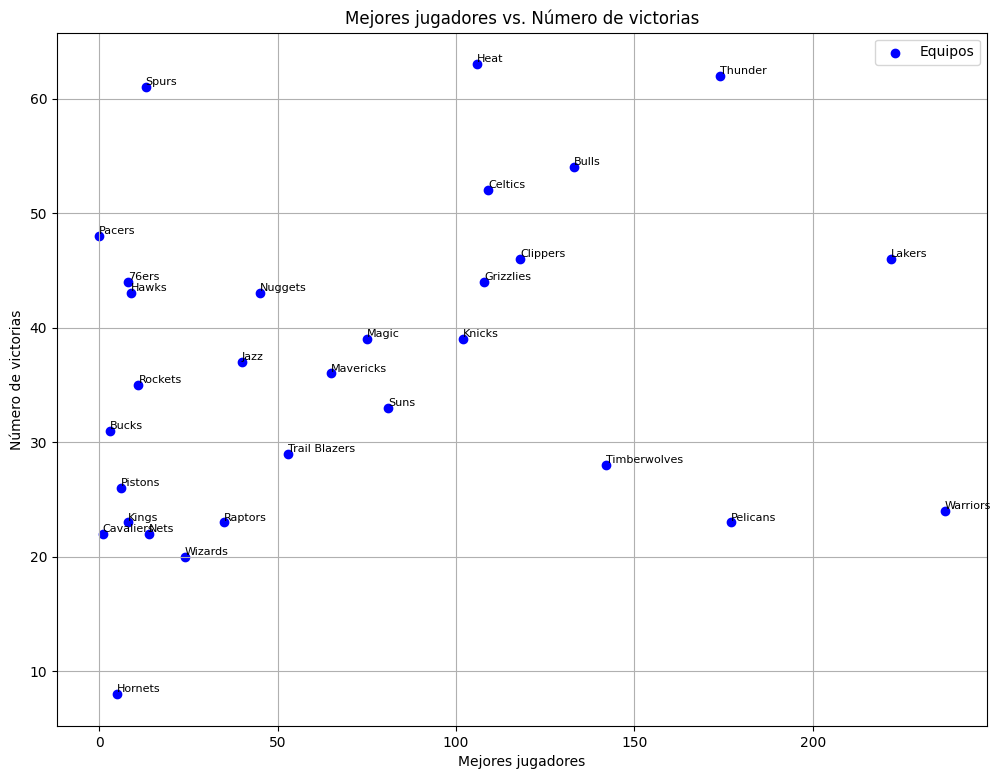

: 

In [25]:
dataframe_for_details = pd.read_csv("Datos_Formateados/2011.csv")
equipos_ids = get_equipos(dataframe=dataframe_liga)
equipos_nombres = get_nombres_equipo(lista_ids=equipos_ids, dataframe_equipos=dataframe_equipos)
mejores_jugadores_todos_equipos = []
victorias_todos_equipos = []
for equipo in equipos_ids:
    mejores_jugadores_todos_equipos.append(get_mejores_jugadores(equipo=equipo))
    victorias_todos_equipos.append(get_victorias(dataframe=dataframe_for_details, equipo=equipo))
minimos_puntos = min(mejores_jugadores_todos_equipos)
maximos_puntos = max(mejores_jugadores_todos_equipos)
maximas_victorias = max(victorias_todos_equipos)

plt.figure(figsize=(12, 9))
plt.scatter(mejores_jugadores_todos_equipos, victorias_todos_equipos, color='blue', label='Equipos')  # Puntos en la gráfica para cada equipo
for i, equipo in enumerate(equipos_nombres):
    plt.text(mejores_jugadores_todos_equipos[i], victorias_todos_equipos[i], equipo, fontsize=8, ha='left', va='bottom')
plt.xlabel('Mejores jugadores')
plt.ylabel('Número de victorias')
plt.title('Mejores jugadores vs. Número de victorias')
plt.grid(True)
plt.legend()
plt.xticks(range(minimos_puntos-1, maximos_puntos+1, 5))  # Definir los límites y el paso del eje x
plt.yticks(range(0, maximas_victorias+1, 2))  # Definir los límites y el paso del eje y
plt.show()